In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import vector
import numpy as np
from scipy import stats
from scipy.stats import expon
from scipy.optimize import differential_evolution

In [2]:
samples_off = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

samples_pri = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [3]:
fileset_off = utilities.make_fileset(samples_off, "ffntuple_official")
fileset_pri = utilities.make_fileset(samples_pri, "ffntuple_private")

events_off, events_pri = {}, {}

for i in tqdm(samples_off):
    fname = fileset_off[i][0]
    print(fname)
    events_off[i] = NanoEventsFactory.from_root(
        fname,
        treepath='ffNtuplizer/ffNtuple',
        schemaclass=ffschema.FFSchema,
    ).events()

    
for i in tqdm(samples_pri):
    fname = fileset_pri[i][0]
    print(fname)
    events_pri[i] = NanoEventsFactory.from_root(
        fname,
        treepath='ffNtuplizer/ffNtuple',
        schemaclass=ffschema.FFSchema,
    ).events()

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/official/SIDM_XXTo2ATo4Mu_mXX-500_mA-5_ctau-0p08_off.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/official/SIDM_XXTo2ATo4Mu_mXX-500_mA-5_ctau-0p80_off.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/official/SIDM_XXTo2ATo4Mu_mXX-500_mA-5_ctau-8p00_off.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/official/SIDM_XXTo2ATo4Mu_mXX-500_mA-5_ctau-40p0_off.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/official/SIDM_XXTo2ATo4Mu_mXX-500_mA-5_ctau-80p0_off.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/Private/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_v6.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/Private/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8_v6.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/Private/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0_v6.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/Private/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0_v6.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/Private/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0_v6.root


In [4]:
print(events_off["4mu_500GeV_5GeV_0p08mm"].fields)

['run', 'event', 'lumi', 'fixedGridRho', 'puInteractionNum', 'trueInteractionNum', 'weight', 'weightProduct', 'HLT_DoubleL2Mu23NoVtx_2Cha', 'HLT_DoubleL2Mu23NoVtx_2Cha_NoL2Matched', 'HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed', 'HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed_NoL2Matched', 'HLT_DoubleL2Mu25NoVtx_2Cha', 'HLT_DoubleL2Mu25NoVtx_2Cha_NoL2Matched', 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed', 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed_NoL2Matched', 'HLT_DoubleL2Mu25NoVtx_2Cha_Eta2p4', 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed_Eta2p4', 'HLT_Mu38NoFiltersNoVtxDisplaced_Photon38_CaloIdL', 'HLT_Mu43NoFiltersNoVtx_Photon43_CaloIdL', 'tomatchfilter_result', 'tomatchfilter_HLTDoubleL2Mu23NoVtx2Cha', 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaNoL2Matched', 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaCosmicSeed', 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaCosmicSeedNoL2Matched', 'tomatchfilter_HLTDoubleL2Mu25NoVtx2ChaEta2p4', 'tomatchfilter_HLTDoubleL2Mu25NoVtx2ChaCosmicSeedEta2p4', 'L1TOHLT_DoubleL2Mu25NoVtx_2Cha_Cosmic

In [5]:
print(events_off["4mu_500GeV_5GeV_0p08mm"].gen.fields)

['x', 'y', 'z', 't', 'charge', 'pid', 'daupid', 'daudr', 'posx', 'posy', 'posz', 'dauposdr', 'dauposdz', 'dauposdphi', 'dauvtx', 'vtx']


In [6]:
print(events_off["4mu_500GeV_5GeV_0p08mm"].gen.vtx.fields)

['x', 'y', 'z']


In [7]:
print(events_off["4mu_500GeV_5GeV_0p08mm"].gen.dauvtx.fields)

['x', 'y', 'z']


In [8]:
print(events_off["4mu_500GeV_5GeV_0p08mm"].gen.vtx)
print(events_off["4mu_500GeV_5GeV_0p08mm"].gen.dauvtx)

[[{x: 0.0101, y: 0.0419, z: 3.31}, {x: 0.0101, ... {x: 0.173, y: 0.0361, z: -3.06}]]
[[{x: 0.0101, y: 0.0419, z: 3.31}, {x: 0.0415, ... {x: nan, y: nan, z: nan}]]


In [42]:
events_off["4mu_500GeV_5GeV_0p08mm"].gen.vtx

<ThreeVectorArray [[{x: 0.0101, y: 0.0419, ... z: -3.06}]] type='52500 * var * T...'>

In [9]:
print(events_off["4mu_500GeV_5GeV_0p08mm"].gen.dauvtx - events_off["4mu_500GeV_5GeV_0p08mm"].gen.vtx)

[[{x: 0, y: 0, z: 0}, {x: 0.0314, y: 0.000421, ... {x: nan, y: nan, z: nan}]]


In [10]:
print((events_off["4mu_500GeV_5GeV_0p08mm"].gen.dauvtx - events_off["4mu_500GeV_5GeV_0p08mm"].gen.vtx).rho)

[[0, 0.0439, 0.00249, nan, nan, nan, nan], ... [0, 1.3, 0.192, nan, nan, nan, nan]]


In [ ]:
print((events_off["4mu_500GeV_5GeV_0p08mm"].gen.dauvtx - events_off["4mu_500GeV_5GeV_0p08mm"].gen.vtx).p)

[[0, 0.0439, 0.00249, nan, nan, nan, nan], ... [0, 1.3, 0.192, nan, nan, nan, nan]]


In [4]:
def extract_values(events, sample):
    
    masked_gen = events["{0}".format(sample)].gen[(abs(events["{0}".format(sample)].gen.pid) == 32) & (abs(events["{0}".format(sample)].gen.daupid) == 13)]
    
    masked_gen_vec = vector.zip({
        "px": masked_gen.x,
        "py": masked_gen.y,
        "pz": masked_gen.z,
        "e": masked_gen.t})
    
    masked_gen_vec_x = masked_gen_vec.x
    masked_gen_vec_y = masked_gen_vec.y
    masked_gen_vec_z = masked_gen_vec.z
    masked_gen_vec_t = masked_gen_vec.t
    
    rho = ak.flatten((masked_gen.dauvtx - masked_gen.vtx).rho)
    gamma = ak.flatten(masked_gen_vec.gamma)
    beta = ak.flatten(masked_gen_vec.beta)
    
    return rho, gamma, beta

In [5]:
def plotting(events, sample, ranges, i, j, co):
    
    plt_range = (0, ranges)
    
    rho, gamma, beta = extract_values(events, sample)

    lxyz_gb = rho/(gamma * beta)
    
    P = stats.expon.fit(lxyz_gb)
    
    ax[i][j].hist(lxyz_gb, range=plt_range, linewidth=3, bins=100, histtype='step', label=sample, density=True, color=co)
    ax[i][j].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P), label=fr"exp[ -(x - {P[0]:.3e}) / {P[1]:.3e} ] / {P[1]:.3e}", color='black')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=18)
    ax[i][j].set_xlabel(r"$L_{xyz}$/$\beta\gamma$")

In [38]:
def plotting_below15(events, sample, ranges, i, j, co):
    
    plt_range = (0, ranges)
    
    rho, gamma, beta = extract_values(events, sample)
    
    lxyz_gb_pre = rho/(gamma * beta)
    mask = lxyz_gb_pre < 10
    lxyz_gb_below15 = lxyz_gb_pre[mask]
    
    P = stats.expon.fit(lxyz_gb_below15)

    print("lxyz/gb before selection", lxyz_gb_pre)
    print("lxyz/gb length before selection", len(lxyz_gb_pre))
    
    print("lxyz/gb after selection", lxyz_gb_below15)
    print("lxyz/gb length after selection", len(lxyz_gb_below15))

    ax[i][j].hist(lxyz_gb_below15, range=plt_range, linewidth=3, bins=100, histtype='step', label=sample, density=True, color=co)
    ax[i][j].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P), label=fr"exp[ -(x - {P[0]:.3e}) / {P[1]:.3e} ] / {P[1]:.3e}", color='black')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=18)
    ax[i][j].set_xlabel(r"$L_{xyz}$/$\beta\gamma$ (Fit selection with < 10)")

lxyz/gb before selection [0.000668, 5.25e-05, 0.0149, 0.0173, 0.0072, ... 0.00616, 0.00367, 0.0215, 0.00261]
lxyz/gb length before selection 105000
lxyz/gb after selection [0.000668, 5.25e-05, 0.0149, 0.0173, 0.0072, ... 0.00616, 0.00367, 0.0215, 0.00261]
lxyz/gb length after selection 105000
lxyz/gb before selection [0.0315, 0.112, 0.0353, 0.126, 0.0671, ... 0.0369, 0.0443, 0.00405, 0.261, 0.0592]
lxyz/gb length before selection 48710
lxyz/gb after selection [0.0315, 0.112, 0.0353, 0.126, 0.0671, ... 0.0369, 0.0443, 0.00405, 0.261, 0.0592]
lxyz/gb length after selection 48710
lxyz/gb before selection [0.248, 0.336, 1.18, 0.536, 1.39, 0.342, ... 0.174, 0.0228, 1.18, 0.179, 0.42, 1.41]
lxyz/gb length before selection 104898
lxyz/gb after selection [0.248, 0.336, 1.18, 0.536, 1.39, 0.342, ... 0.174, 0.0228, 1.18, 0.179, 0.42, 1.41]
lxyz/gb length after selection 104898
lxyz/gb before selection [1.93, 2.15, 0.36, 1.67, 4.81, 3.58, 1.07, ... 8.29, 5.86, 3.52, 0.682, 0.0301, 4.99]
lxyz/gb l

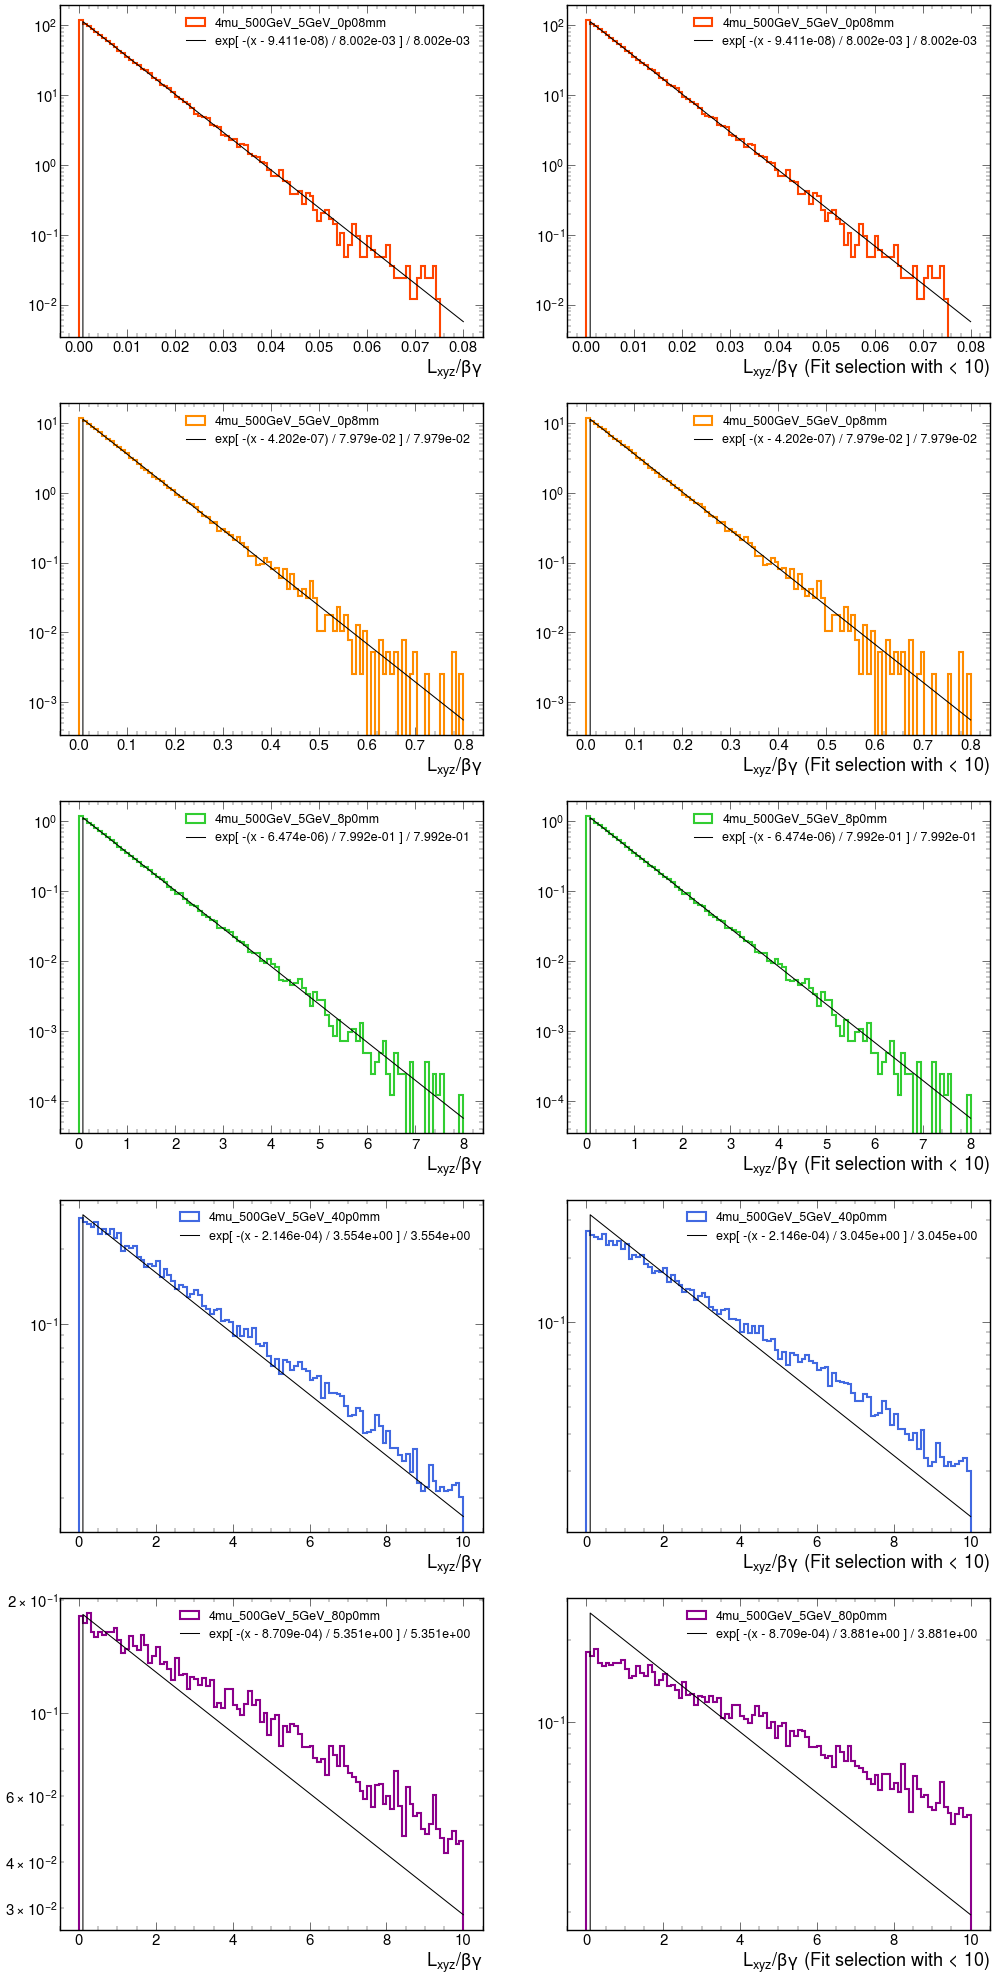

In [39]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24, 50)) 

plotting(events_off, "4mu_500GeV_5GeV_0p08mm", 0.08, 0, 0, "orangered")
plotting_below15(events_off, "4mu_500GeV_5GeV_0p08mm", 0.08, 0, 1, "orangered")

plotting(events_off, "4mu_500GeV_5GeV_0p8mm", 0.8,1,0, "darkorange")
plotting_below15(events_off, "4mu_500GeV_5GeV_0p8mm", 0.8,1,1, "darkorange")

plotting(events_off, "4mu_500GeV_5GeV_8p0mm", 8,2,0, "limegreen")
plotting_below15(events_off, "4mu_500GeV_5GeV_8p0mm", 8,2,1, "limegreen")

plotting(events_off, "4mu_500GeV_5GeV_40p0mm", 10,3,0, "royalblue")
plotting_below15(events_off, "4mu_500GeV_5GeV_40p0mm", 10,3,1, "royalblue")

plotting(events_off, "4mu_500GeV_5GeV_80p0mm", 10,4,0, "darkmagenta")
plotting_below15(events_off, "4mu_500GeV_5GeV_80p0mm", 10,4,1, "darkmagenta")